<a href="https://colab.research.google.com/github/Mc4minta/AIB5-PcapAttackClassifier/blob/main/RandomForest400IntPort_BenignAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/Dataset/TrainRfWeb.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1178706 entries, 0 to 1178705
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Source_Port                  1178706 non-null  int64  
 1   Destination_Port             1178706 non-null  int64  
 2   Flow_Duration                1178706 non-null  int64  
 3   Total_Fwd_Packets            1178706 non-null  int64  
 4   Total_Backward_Packets       1178706 non-null  int64  
 5   Total_Length_of_Fwd_Packets  1178706 non-null  float64
 6   Total_Length_of_Bwd_Packets  1178706 non-null  float64
 7   Fwd_Packet_Length_Max        1178706 non-null  float64
 8   Fwd_Packet_Length_Min        1178706 non-null  float64
 9   Fwd_Packet_Length_Mean       1178706 non-null  float64
 10  Fwd_Packet_Length_Std        1178706 non-null  float64
 11  Bwd_Packet_Length_Max        1178706 non-null  float64
 12  Bwd_Packet_Length_Min        1178706 non-null  

In [12]:
df.head()

,Source_Port,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,4,6,7182757,1,5,6.0,30.0,6.0,6.0,6.0,...,20,45201.000,0.000,45201.0,45201.0,7137556.0,0.00,7137556.0,7137556.0,Benign
1,4,6,938509,1,5,6.0,30.0,6.0,6.0,6.0,...,20,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,Benign
2,6,6,119995732,123,0,0.0,0.0,0.0,0.0,0.0,...,0,3753432.167,5183854.063,13200000.0,1.0,13100000.0,6507819.26,26300000.0,6484077.0,Benign
3,6,5,142954,10,6,553.0,3949.0,196.0,0.0,55.3,...,20,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,Benign
4,4,6,2548725,1,6,6.0,36.0,6.0,6.0,6.0,...,20,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,Benign


In [6]:
df = df[~df['Label'].isin(['Web-Bruteforce', 'XSS', 'SQLi'])]
df['Label'].value_counts()

,count
Label,
Benign,626333
DoS,251712
PortScan,158804
DDoS,128025
FTP-Bruteforce,7935
SSH-Bruteforce,5897


In [9]:
df['Label'] = df['Label'].apply(lambda x: 'Attack' if x != 'Benign' else x)
display(df['Label'].head())

,Label
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


In [10]:
df['Label'].value_counts()

,count
Label,
Benign,626333
Attack,552373


# Model Training

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split Features and Label
X = df.drop('Label', axis=1)
y = df['Label']

# Train Test Split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total size: {X_train.shape[0] + X_test.shape[0]}")
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Total size: 1178706
Train size: 942964
Test size: 235742


In [14]:
# Train the model
model = RandomForestClassifier(n_estimators=400, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [15]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/RandomForest400IntPort-BenignAttack')

['/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/RandomForest400IntPort-BenignAttack']

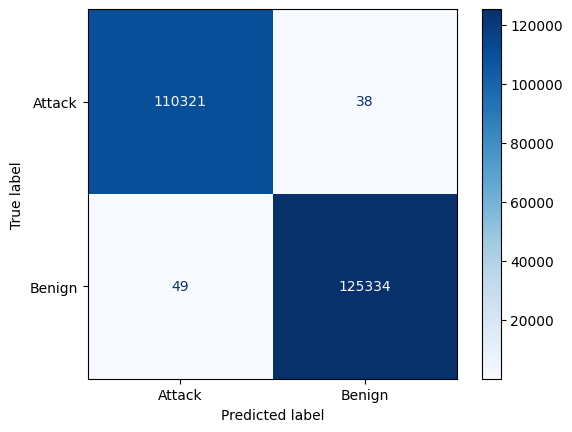

In [16]:
# print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    110359
      Benign       1.00      1.00      1.00    125383

    accuracy                           1.00    235742
   macro avg       1.00      1.00      1.00    235742
weighted avg       1.00      1.00      1.00    235742

